<h1 style="text-align : center"> <font color="red" size=8>CLASSIFICATION METRICS</h1>

## <font color="dark blue">WHAT IS CLASSIFICATION METRICS?
- The Metrics used for evaluate the performance of Classification Model is known as Regression Metrics.
- Popular Regression Metrics are:
    > - __ACCURACY__ 
    > - __CONFUSION MATRIX__ 
    > - __PRECISION__ 
    > - __RECALL__
    > - __LOGARITHM LOSS (LOG LOSS)__

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv(r"D:\DUDUL DS\CAMPUSX\ML\ALL METRICS\2. CLASSIFICATION METRICS\DATASET\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(columns=["Id"],inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X=df.drop(columns=["Species"])
y=df["Species"]

In [6]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [8]:
dt=DecisionTreeClassifier()

In [9]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred=dt.predict(X_test)

## <font color="blue">a. ACCURACY
- Accuracy is a common metric used to evaluate the performance of a classification model. 
- It measures the proportion of correct predictions made by the model out of the total number of predictions.
    
$$ACCURACY = \frac{NO. \ OF \ CORRECT \ PREDICTION}{TOTAL \ NUMBER \ OF \ SAMPLES}$$

- A higher accuracy score indicates a better-performing model.

### <font color="olive">LIMITATION
- It does not give which type of error model occured.
- If the dataset is imbalanced, then it biased towards majority class.
    

- `To overcome this issue, we use another Classification Metrics.`

## <font color="orange">CODE FOR ACCURACY

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test,y_pred)

1.0

## <font color="blue">b. CONFUSION MATRIX
- A classification matrix, also known as a confusion matrix, is a table that visualizes the performance of a classification model. 
- It helps us understand the types of errors a model makes and its overall accuracy.
- It creates a N X N matrix, where N is the number of classes or categories that are to be predicted.

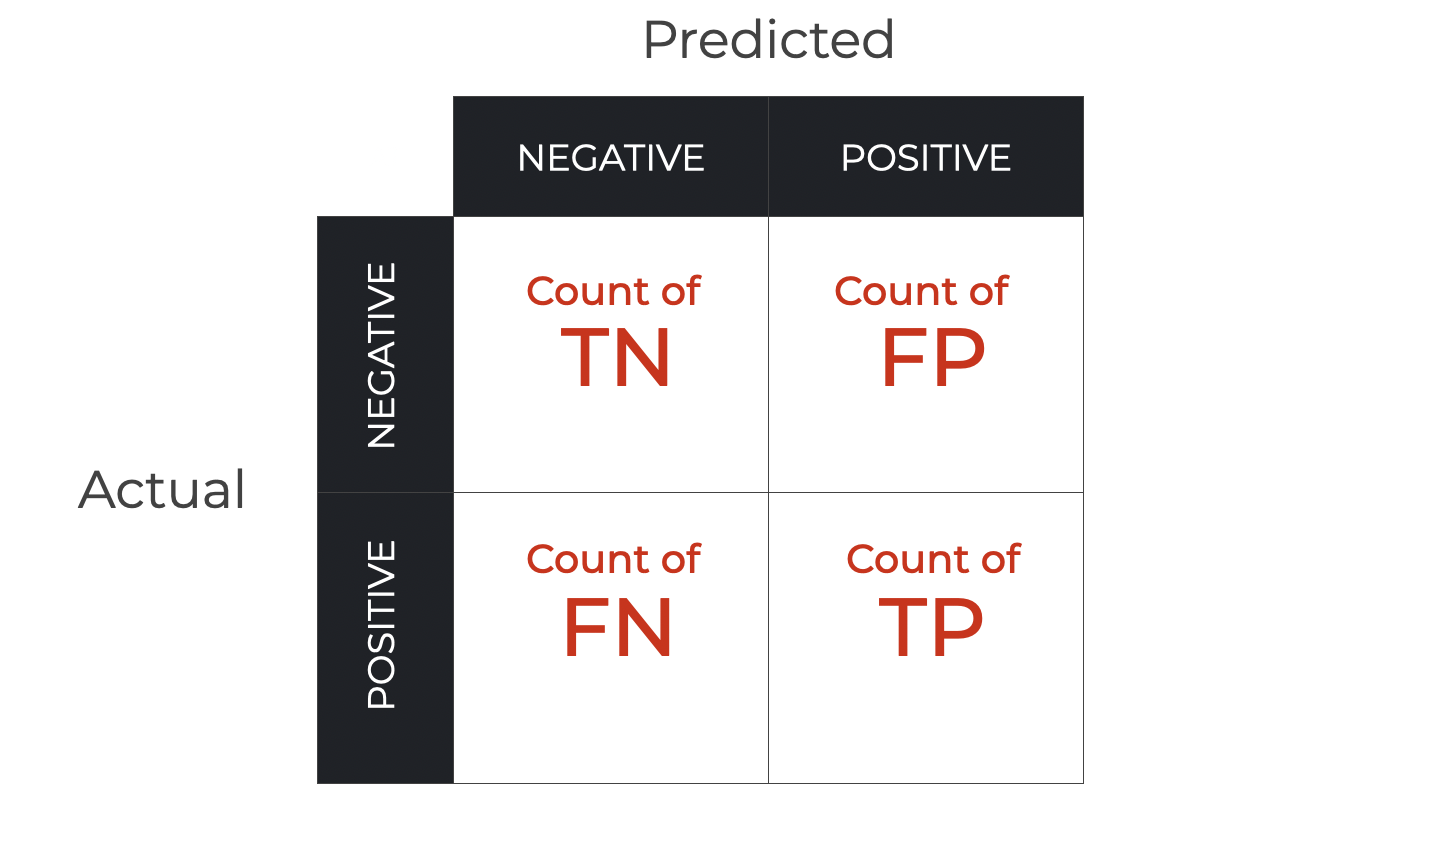

### TN: $\rightarrow$ 
- It is True Negative. 
- Actual Label is __Negative__ & Our Model is predicted as __Negative__.
- __`The model correctly predicted a Negative Class.`__

### TP: $\rightarrow$ 
- It is True Positive. 
- Actual Label is __Positive__ & Our Model is predicted as __Positive__.
- __`The model correctly predicted a Positive Class.`__


### FP: $\rightarrow$ 
- It is False Positive. 
- Actual Label is __Negative__ & Our Model is predicted as __Positive__. 
- __`The model incorrectly predicted a Positive Class.`__
- It is also known as __`Type I`__ Error.


### FN: $\rightarrow$ 
- It is False Negative. 
- Actual Label is __Postive__ & Our Model is predicted as __Negative__. 
- __`The model incorrectly predicted a Negative Class.`__
- It is also known as __`Type II`__ Error.


## <font color="olive"> INTERPRETATION CONFUSION MATRIX
- Diagonal Elements represent the correct prediction.
- Off-Diagonal Elements represent the incorrect prediction.

$$OVERALL \ ACCURACY = \frac{TN+TP}{TN+FN+TP+FP}$$

### <font color="olive"> ADVANTAGES
- Provide detail explaination of the model's performance.
- Shows which type of error done by the model.
- From this we can derive other Matrixes.

## <font color="orange">CODE FOR CONFUSION MATRIX

In [13]:
from sklearn.metrics import confusion_matrix

In [20]:
cm=confusion_matrix(y_test,y_pred,labels=dt.classes_)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

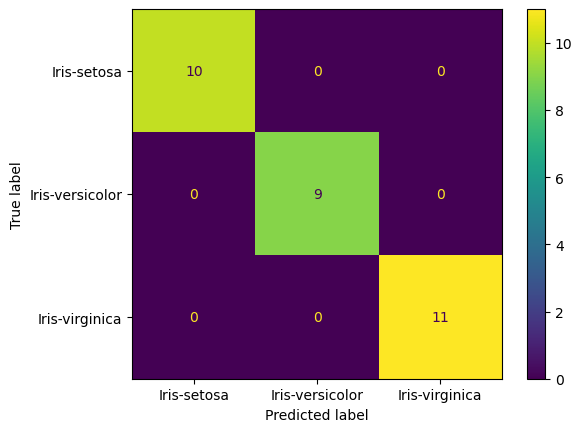

In [23]:
cmdis=ConfusionMatrixDisplay(cm,display_labels=dt.classes_)
cmdis.plot()

## <font color="blue">c. PRECISION
- It tells about the model's reliability.
- Out of all the positive predictions, how many were correctly predicted as positive.
- When we have to decrease the __False Positive__ / when __False Positive__ is important than __False Negative__ in that case we use Precision.
- eg: $\rightarrow$ Recommendatin System / Spam Detection
$$PRECISION = \frac{TP}{TP+FP}$$

## <font color="orange">CODE FOR PRECISION

In [25]:
from sklearn.metrics import precision_score

In [27]:
precision_score(y_test,y_pred,average="micro")

1.0

## <font color="purple">PARAMETERS OF PRECISION FUNCTION
__1. y_true__: The true labels of the data points.
    
__2. y_pred__: The predicted labels from the model.
    
__3. labels__: The set of labels to include in the calculation. If not specified, all labels in y_true and y_pred are used.
    
__4. pos_label__: The label to consider as positive. This is relevant for binary classification problems.
    
__5. average__:
>- __`binary`__: Calculates the precision for the specified positive class.   
>- __`micro`__: Calculates the precision globally by counting the total true positives and false positives.   
>- __`macro`__: Calculates the precision for each class individually, then averages them.   
>- __`weighted`__: Calculates the precision for each class, weights it by the number of true instances for that class, and averages the results.
    
__6. sample_weight__: Weights associated with individual samples.
    
__7. zero_division__: Determines how to handle cases where a division by zero occurs. Options are 'warn' (default), 'raise', or 0.

## <font color="blue">d. RECALL
- It tells about the model's ability.
- Out of all the positive actual, how many were correctly predicted as positive.
- When we have to decrease the __False Negative__ / when __False Negative__ is important than __False Positive__ in that case we use Precision.
- eg: $\rightarrow$ Cancer Detection / Covid Predition (Rare Decease)
$$RECALL \ (ON \ +VE \ \ CLASS) = \frac{TP}{TP+FN} \Rightarrow SENSITIVITY$$

$$RECALL \ (ON \ -VE \ \ CLASS) = \frac{TN}{TP+FP} \Rightarrow SPECITIVITY$$

## <font color="orange">CODE FOR RECALL

In [28]:
from sklearn.metrics import recall_score

In [29]:
recall_score(y_test,y_pred,average="micro")

1.0

## <font color="purple">PARAMETERS OF RECALL FUNCTION
__1. y_true__: The true labels of the data points.
    
__2. y_pred__: The predicted labels from the model.
    
__3. labels__: The set of labels to include in the calculation. If not specified, all labels in y_true and y_pred are used.
    
__4. pos_label__: The label to consider as positive. This is relevant for binary classification problems.
    
__5. average__:
>- __`binary`__: Calculates the precision for the specified positive class.   
>- __`micro`__: Calculates the precision globally by counting the total true positives and false positives.   
>- __`macro`__: Calculates the precision for each class individually, then averages them.   
>- __`weighted`__: Calculates the precision for each class, weights it by the number of true instances for that class, and averages the results.
    
__6. sample_weight__: Weights associated with individual samples.
    
__7. zero_division__: Determines how to handle cases where a division by zero occurs. Options are 'warn' (default), 'raise', or 0.

##  __[MORE ABOUT PRECISION & RECALL](https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall)__

## <font color="blue">e. LOG LOSS
- Log loss, also known as __cross-entropy loss__, is a popular metric used to evaluate the performance of classification models, especially those that output probabilities. 
- It measures the discrepancy between the predicted probabilities and the actual labels.

### <font color="green">INTERPRETATION
- Lower Log-loss indicates better performance of model.
- Higher Log-loss indicates worst performance of model.

### <font color="green">WHY TO USE LOG LOSS?
- It is used to comparison of 2 or more models.

$$\large LOG-LOSS = -\sum_{i=1}^{n}\{ (y_i \log(\sigma(w^Tx_i+w_o) + (1-y_i)*\log(1-\sigma(w^Tx_i+w_o))  \}$$

In [ ]:
from sklearn.metrics import log_loss

## <font color="purple">PARAMETERS OF LOG-LOSS FUNCTION
__1. y_true__: The true labels of the data points.
    
__2. y_pred__: The predicted probabilities for each class.
    
__3. normalize (default=`True`)__:
    - If `True`, returns the mean loss per sample.
    - If `False`, returns the sum of the per-sample losses.

__4. sample_weight (optional)__: Sample weights.

__5. labels (optional)__:The set of labels to include in the calculation. If not specified, all labels in y_true and y_pred are used.
